## Problem 1

In [118]:
def integral_approx(g, a, b, N, method):
    area = 0
    segment = (b-a)/N
    start = a
    end = a + segment
    if method == 'midpoint':
        for i in range(N):
            area += (g((start+end)/2))*segment
            start = end
            end = start + segment
    elif method == 'trapezoid':
        for i in range(N):
            area += ((g(start)+g(end))/2)*segment
            start = end
            end = start+segment
    elif method == 'Simpsons':
        for i in range(N):
            area += (g(start)+g(end)+4*g((start+end)/2))*(segment/6)
            start = end
            end = start+segment
    else:
        raise ValueError("Method must be 'midpoint' or 'trapezoid' or 'Simpsons'")
    return area

g = lambda x: (0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1)
a = -10
b = 10
N = 1000

value = float(13120/3)

print("MIDPOINT METHOD")
midpoint = integral_approx(g,a,b,N,'midpoint')
print(midpoint)
print("error = " + str(abs(midpoint-value)))
print("")
print("TRAPEZOID METHOD")
trapezoid= integral_approx(g,a,b,N,'trapezoid')
print(trapezoid)
print("error = " + str(abs(trapezoid-value)))
print("")
print("SIMPSONS METHOD")
simpsons = integral_approx(g,a,b,N,'Simpsons')
print(simpsons)
print("error = " + str(abs(simpsons-value)))
print("")

    

MIDPOINT METHOD
4373.319646676187
error = 0.013686657145626668

TRAPEZOID METHOD
4373.360706656192
error = 0.027373322858693427

SIMPSONS METHOD
4373.333333336201
error = 2.8676367946900427e-09



In [119]:
#Test that Value Error works 

integral_approx(g,a,b,N,'newton')

ValueError: Method must be 'midpoint' or 'trapezoid' or 'Simpsons'

## Problem 2

(array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]), array([ 0.00346697,  0.01439745,  0.04894278,  0.11725292,  0.19802845,
        0.23582284,  0.19802845,  0.11725292,  0.04894278,  0.01439745,
        0.00346697]))
(array([ -8. ,  -6.2,  -4.4,  -2.6,  -0.8,   1. ,   2.8,   4.6,   6.4,
         8.2,  10. ]), array([ 0.00346697,  0.01439745,  0.04894278,  0.11725292,  0.19802845,
        0.23582284,  0.19802845,  0.11725292,  0.04894278,  0.01439745,
        0.00346697]))


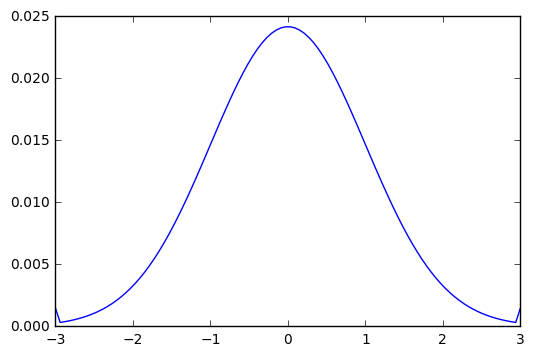

In [120]:
from matplotlib import pyplot as plt

import scipy.stats
import numpy as np

def NC_Normal(mu, sigma, N, k):
    Z = np.zeros(N)
    W = np.zeros(N)
    start = mu - sigma*k
    interval = (2*sigma*k)/(N-1)
    for i in range(N):
        Z[i] = start + i*interval
    W[0] = scipy.stats.norm.cdf(((((Z[0]+Z[1])/2) - mu))/sigma)
    i = 1
    while i < (N-1):
        W[i] = -scipy.stats.norm.cdf(((((Z[i-1]+Z[i])/2) - mu))/sigma) + \
        scipy.stats.norm.cdf(((((Z[i]+Z[i+1])/2) - mu))/sigma)
        i += 1
    W[N-1] = 1 - scipy.stats.norm.cdf(((((Z[N-2]+Z[N-1])/2) - mu))/sigma)
    return Z, W

print(NC_Normal(0,1,11,3))
print(NC_Normal(1,3,11,3))

Z,W = NC_Normal(0,1,100,3)
plt.plot(Z,W)
plt.show()

We note that changing the mean and standard deviation does not shift the weights, however changing the values for N or k do shift the weights. Changing the mean and standard deviation only changes the location of the nodes

## Problem 3

In [121]:


def NC_LogNormal(mu, sigma, N, k):
    """Inputs are based on the distribution of Z
    Function returns weights and nodes for LogNormal distribution
    Calls NC_Normal function from problem 2"""
    Z, W = NC_Normal(mu, sigma, N, k)
    Z = np.exp(Z)
    return Z, W

print(NC_LogNormal(0,1,11,3))

(array([  0.04978707,   0.09071795,   0.16529889,   0.30119421,
         0.54881164,   1.        ,   1.8221188 ,   3.32011692,
         6.04964746,  11.02317638,  20.08553692]), array([ 0.00346697,  0.01439745,  0.04894278,  0.11725292,  0.19802845,
        0.23582284,  0.19802845,  0.11725292,  0.04894278,  0.01439745,
        0.00346697]))


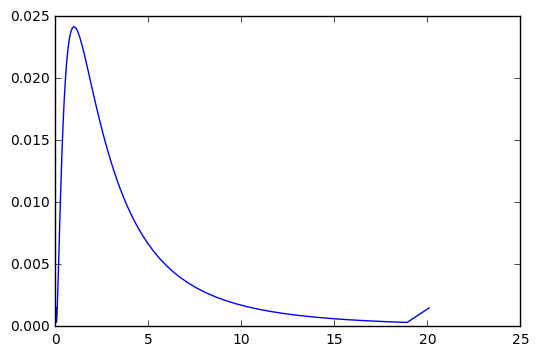

In [122]:

Z, W = NC_LogNormal(0,1,100,3)
plt.plot(Z,W)
plt.show()

We note that this seems to give a good approximation of the shape of the pdf of the LogNormal distribution.

## Problem 4:

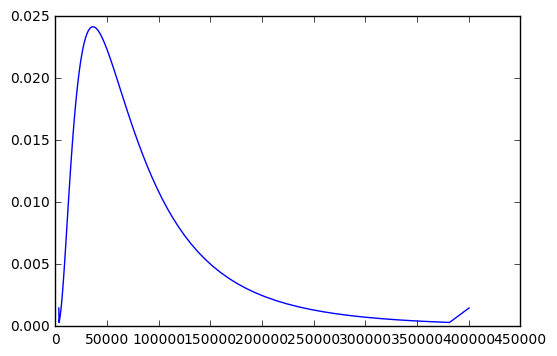

In [123]:
mu = 10.5
sigma = 0.8

Z, W = NC_LogNormal(mu,sigma,100,3)
plt.plot(Z,W)
plt.show()

In [124]:
import math
#Using method similar to Trapezoid Rule to approximate the expected value given by int(x*f(x))
area = 0
start = Z[0]
end = Z[1]

for i in range(len(Z)):
    area += (W[i])*(Z[i])

print(area)
print(math.exp(mu+(sigma**2)/2))


49862.015733
50011.087008521754


The approximated expected income slightly underestimates the true expected income.

## Problem 5

In [125]:
#Find the appropriate weights and nodes
a = -10
b = 10
g = lambda x: (0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1)

from scipy.optimize import fsolve
import math

def equations(p):
    w1,w2,w3,x1,x2,x3 = p
    return (w1+w2+w3-b+a, w1*x1+w2*x2+w3*x3 - 0.5*b**2 + 0.5*a**2, \
            w1*x1**2+w2*x2**2+w3*x3**2-(1/3)*b**3+(1/3)*a**3, \
            w1*x1**3+w2*x2**3+w3*x3**3-(1/4)*b**4+(1/4)*a**4, \
            w1*x1**4+w2*x2**4+w3*x3**4-(1/5)*b**5+(1/5)*a**5, \
            w1*x1**5+w2*x2**5+w3*x3**5-(1/6)*b**6+(1/6)*a**6)
            
w1,w2,w3,x1,x2,x3 =  fsolve(equations, (0.4,0.9,0.4,-5,0,5))

W = np.array([w1,w2,w3])
X = np.array([x1,x2,x3])

value = float(13120/3)

area = 0
for i in range(len(X)):
    area += (g(X[i]))*(W[i])
integral = area
print("Area = " + str(integral))
print("Error = " + str(abs(integral-value)))



Area = 4373.33336959
Error = 3.62523778676e-05


## Problem 6

In [126]:
g = lambda x: (0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1)
a = -10
b = 10
N = 1000

print(scipy.integrate.quad(g,a,b))

(4373.333333333334, 8.109531705284936e-11)


The error from this approximation is quite small and is given by the second argument in the output.

## Problem 7

In [150]:
def montecarlo(g, domain, N):
    """Returns the Monte Carlo approximation for area in a rectangle
    
    INPUTS:
    g: anonymous function of a vector of variables x
    domain: generalized rectangle
    N: number of random draws
    
    RETURNS: Monte Carlo approximation for area"""
    total = (domain[1]-domain[0])*(domain[3]-domain[2])
    success = 0
    for i in range(N):
        x = np.zeros(2)
        x[0] = np.random.uniform(domain[0],domain[1])
        x[1] = np.random.uniform(domain[2],domain[3])
        success += g(x)
    return (success/N)*total

In [151]:
#Test that our function gives a reasonable output:
N = 1000
domain = [-1,1,-1,1]
g = lambda x: int((x[0])**2 + (x[1])**2 < 1)
montecarlo(g,domain,N)

3.184

In [152]:
#What is the smallest number of random draws to match pi to 4 decimal points?

def mcdraws(g, domain, tol=0.0005, value=3.1415):
    guess = value + 1
    N = 1
    while abs(value-guess) > tol:
        guess = montecarlo(g, domain, N)
        N += 1
    print("After " + str(N)+ " draws achieved value of " + str(guess))
    return N

In [154]:
print(mcdraws(g,domain))
print(mcdraws(g,domain))
print(mcdraws(g,domain))
print(mcdraws(g,domain))
print(mcdraws(g,domain))

After 164 draws achieved value of 3.1411042944785277
164
After 504 draws achieved value of 3.1411530815109345
504
After 192 draws achieved value of 3.141361256544503
192
After 276 draws achieved value of 3.1418181818181816
276
After 812 draws achieved value of 3.1418002466091246
812


## Problem 8

In [237]:
import math

def prime(n):
    """Return the nth prime number"""
    primes = [2]
    test = 3
    while len(primes) < n:
        for p in primes:
            if test % p == 0:
                break
        else:
            primes.append(test)
        test += 2
    return primes[-1]

def fractional(n):
    """Returns the fraction part of n"""
    return float(n % 1)

def equidistributed(n, d, sequence):
    """Returns the nth element of a d-dimensional equidistributed sequence
    Calls the functions prime and fractional
    
    INPUTS:
    n = element number
    d = dimensions of sequence
    sequence = 'Weyl' or 'Haber' or 'Niederreiter' or 'Baker'"""
    
    if sequence == 'Weyl':
        vals = np.zeros(d)
        for i in range(d):
            vals[i] = fractional(n*math.sqrt(prime(i+1)))
        return vals
    elif sequence == 'Haber':
        vals = np.zeros(d)
        for i in range(d):
            vals[i] = fractional((n*(n+1)/2)*math.sqrt(prime(i+1)))
        return vals
    elif sequence == 'Niederreiter':
        vals = np.zeros(d)
        for i in range(d):
            vals[i] = fractional(n*2**((i+1)/(n+1)))
        return vals
    elif sequence == 'Baker':
        vals = np.zeros(d)
        for i in range(d):
            vals[i] = fractional(n*math.exp(i+1))
        return vals 
    else:
        raise ValueError("Sequence must be 'Weyl' or 'Haber' or 'Niederreiter' or 'Baker'")
        
print(equidistributed(8,4,'Haber'))
print(equidistributed(8,4,'Weyl'))
print(equidistributed(8,4,'Niederreiter'))
print(equidistributed(8,4,'Baker'))


[ 0.91168825  0.35382907  0.49844719  0.2470472 ]
[ 0.3137085   0.85640646  0.88854382  0.16601049]
[ 0.64047791  0.33223232  0.0793684   0.88632   ]
[ 0.74625463  0.11244879  0.68429539  0.78520027]


## Problem 9

In [238]:
def quasi_MC(g, domain, N, sequence='Haber'):
    """Returns the Monte Carlo approximation for area in a rectangle
    
    INPUTS:
    g: anonymous function of a vector of variables x
    domain: generalized rectangle
    N: number of random draws
    
    RETURNS: quasi-Monte Carlo approximation for area"""
    total = (domain[1]-domain[0])*(domain[3]-domain[2])
    success = 0
    for i in range(N):
        x = np.zeros(2)
        x[0] = 2*equidistributed(i, 2, sequence)[0]-1
        x[1] = 2*equidistributed(i, 2, sequence)[1]-1
        success += g(x)
    return float((success/N)*total)

In [239]:
N = 1000
domain = [-1,1,-1,1]
g = lambda x: int((x[0])**2 + (x[1])**2 < 1)

In [240]:
#What is the smallest number of random draws to match pi to 4 decimal points?

def quasi_MCdraws(g, domain, sequence, tol=0.0005, value=3.1415):
    guess = value + 1
    N = 1
    while abs(value-guess) > tol:
        guess = quasi_MC(g, domain, N, sequence)
        N += 1
    print("After " + str(N)+ " draws achieved value of " + str(guess))
    return N

In [243]:
print(quasi_MCdraws(g,domain,'Haber'))
print(quasi_MCdraws(g,domain,'Weyl'))

After 490 draws achieved value of 3.1411042944785277
490
After 751 draws achieved value of 3.1413333333333333
751
